In [108]:
import numpy as np                    
import pandas as pd                  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt            


In [109]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [110]:
df = pd.DataFrame()

In [111]:
df['X'] = X.reshape(100)
df['y'] = y

In [112]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [113]:
df['pred1']=df.y.mean()

In [114]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [115]:
df['res1']=df['y'] - df['pred1']

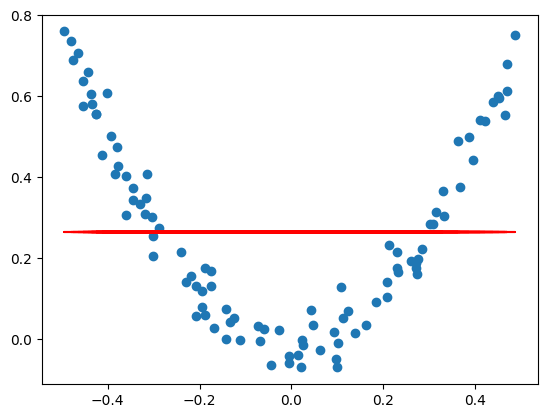

In [116]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
tree1 = DecisionTreeRegressor(max_depth=8)


In [119]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_depth=8)

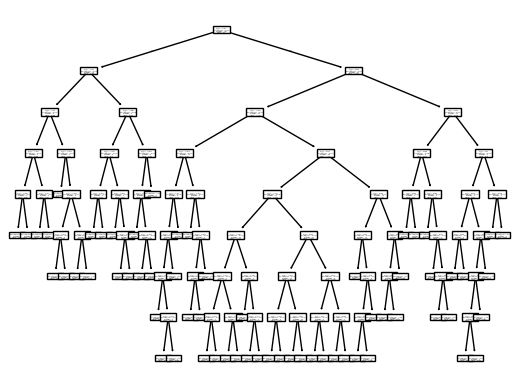

In [120]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [121]:
X_test=np.linspace(-0.5,0.5,100)

In [122]:
y_pred=0.265458+tree1.predict(X_test.reshape(100,1))

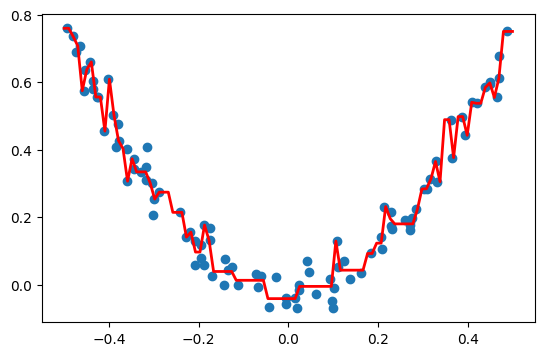

In [123]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [128]:
df['pred2']=0.265458+tree1.predict(df['X'].values.reshape(100,1))

In [130]:
df['res2']= df['y'] - df['pred2']

In [131]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.038881,1.269182e-02
1,0.450714,0.594480,0.265458,0.329021,0.597626,-3.145898e-03
2,0.231994,0.166052,0.265458,-0.099407,0.179941,-1.388927e-02
3,0.098658,-0.070178,0.265458,-0.335636,-0.005301,-6.487648e-02
4,-0.343981,0.343986,0.265458,0.078528,0.334017,9.969285e-03
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.041576,9.009411e-04
96,0.022733,-0.002305,0.265458,-0.267763,-0.005301,2.996734e-03
97,-0.072459,0.032809,0.265458,-0.232650,0.012734,2.007499e-02
98,-0.474581,0.689516,0.265458,0.424057,0.689515,3.966968e-07


In [132]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [133]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [136]:
y_pred1=0.265458+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

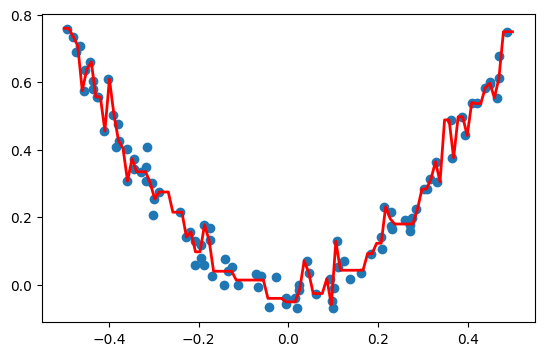

In [137]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred1,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [138]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


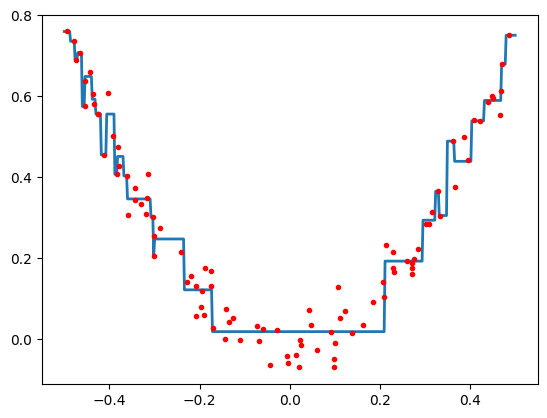

4


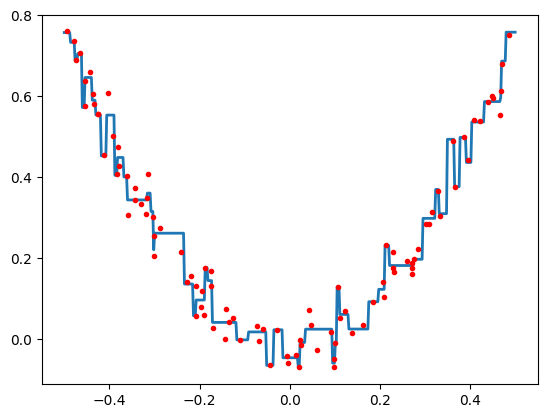

3


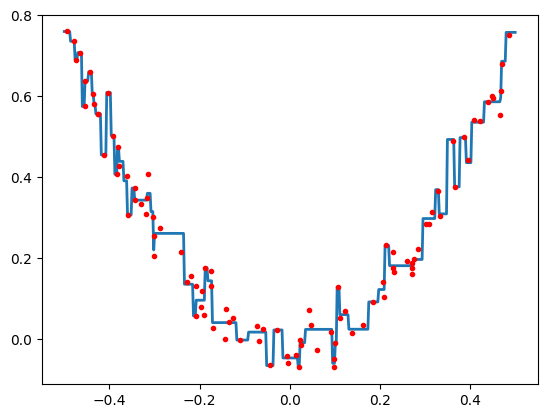

2


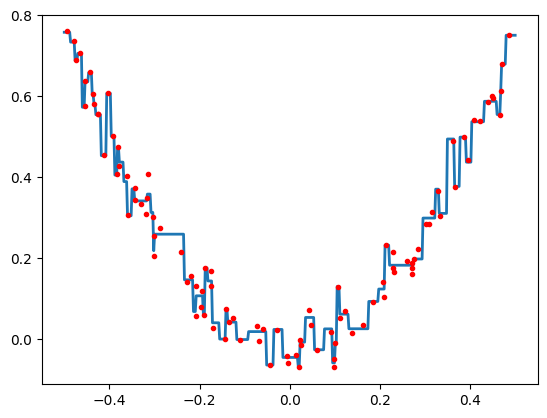

1


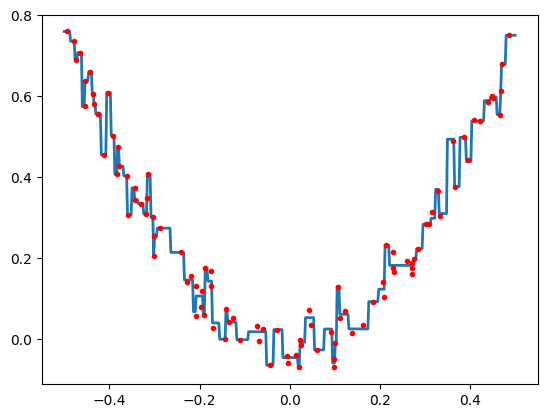

In [139]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)